<a href="https://colab.research.google.com/github/ali1810/Deep_Chem/blob/main/Solubility_ethanol_dataset_rf_xg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sol = pd.read_csv('/content/drive/MyDrive/KIT/ethanol_solubility_data.csv')
sol

,StdInChIKey,SMILES,LogS,T,Source
0,AADVZSXPNRLYLV-XRXNUMIJSA-N,c1ccc2c(c1)c1CCN3C[C@@H]4CC[C@@H]([C@@H]([C@H]...,-2.122892,16.5,Reaxys
1,ABFDTYJJUSUWRB-UHFFFAOYSA-N,CN(C)c1ccc(cc1)N=C=Nc1ccc(cc1)N(C)C,-1.772343,21.0,Reaxys
2,ACGUYXCXAPNIKK-UHFFFAOYSA-N,C(c1c(c(cc(c1O)Cl)Cl)Cl)c1c(c(cc(c1O)Cl)Cl)Cl,0.089475,20.0,Reaxys
3,ACMLKANOGIVEPB-UHFFFAOYSA-N,c1ccc2c(c1)cc(C(=O)O)c(=O)o2,-2.823897,20.0,Reaxys
4,AECGEIVNZGQBJT-UHFFFAOYSA-N,c1ccc(cc1)C(c1ccccc1)(c1ccccc1)SCCC(=O)O,-2.110797,20.0,Reaxys
...,...,...,...,...,...
690,ZVNYJIZDIRKMBF-UHFFFAOYSA-N,COc1ccc(cc1OC)C(=O)N1CCN(CC1)c1ccc2c(CCC(=O)N2)c1,-3.097256,25.0,Reaxys
691,ZWFHVYLMPFPMKA-UHFFFAOYSA-N,Cc1ccc2c(c1)nc(Nc1ccccc1)[nH]2,-0.438765,15.0,Reaxys
692,ZWLPBLYKEWSWPD-UHFFFAOYSA-N,Cc1ccccc1C(=O)O,0.365480,22.9,Reaxys
693,ZXVONLUNISGICL-UHFFFAOYSA-N,Cc1cc(cc(c1O)[N+](=O)[O-])[N+](=O)[O-],-0.766251,15.0,Reaxys


In [ ]:
sol["smiles_length"]= sol["SMILES"].apply(len)

In [ ]:
max_lenghth=max(sol["smiles_length"])
max_lenghth

127

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


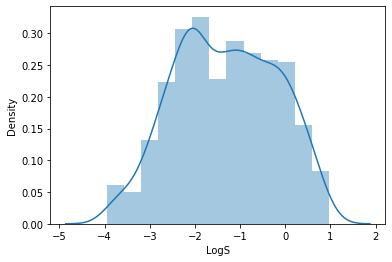

In [ ]:
## Ditribution of LogS....
import seaborn as sns

## Based on the graph we can say the LogS range between -4 to 1
sns.distplot(sol["LogS"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


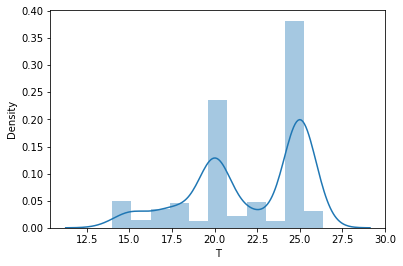

In [ ]:
### Display the range of the temprature :::

sns.distplot(sol["T"])

In [ ]:
#smiles_length = sol["SMILES"],key =len
#print(smiles_length)
sol1  = sol[sol['smiles_length'] < 100]
print(len(sol1))

691


In [ ]:
df1=sol.LogS
df1

0     -2.122892
1     -1.772343
2      0.089475
3     -2.823897
4     -2.110797
         ...   
690   -3.097256
691   -0.438765
692    0.365480
693   -0.766251
694   -2.350352
Name: LogS, Length: 695, dtype: float64

In [ ]:
sol['smiles_mol'] = sol['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))  # Create Mol objects from the SMILES notation


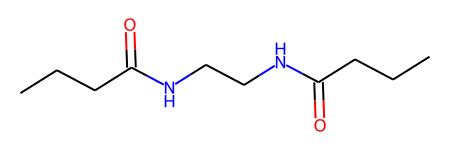

In [ ]:
mol=sol['smiles_mol'].iloc[10]
mol

In [ ]:
## Creating function to create augmented smiles
def show_random_smiles_are_same_labels(mol, number=10):
    """
    Show a few randomly augmented SMILES from the same molecule
    """
    
    vector = []
    labels = []
    for _ in range(number):
        label = Chem.MolToSmiles(mol, doRandom=True)
        labels.append(label)
        vector.append(Chem.MolFromSmiles(label))
    return labels

In [ ]:
mol = sol["smiles_mol"].iloc[10] 
new_vector= []
#new_vector1=np.array[new_vector]
for x in range(0, 695):
  mol = sol["smiles_mol"].iloc[x] 
  y=show_random_smiles_are_same_labels(mol,number=10)
  new_vector.append(y)
print(len(new_vector))  



695


In [ ]:
import numpy as np
numpy_array=np.array(new_vector)

print(numpy_array)

[['C1CN2C[C@H]3[C@H](C[C@H]2c2c1c1ccccc1[nH]2)[C@@H](C(=O)O)[C@@H](O)CC3'
  'C1[C@H]2[C@@H](CC[C@@H]([C@@H]2C(O)=O)O)CN2CCc3c([C@H]12)[nH]c1ccccc13'
  '[C@H]1([C@H](C(O)=O)[C@H]2C[C@@H]3N(C[C@@H]2CC1)CCc1c2ccccc2[nH]c13)O'
  ...
  'c1cccc2[nH]c3[C@H]4N(C[C@H]5[C@H](C4)[C@H]([C@H](CC5)O)C(O)=O)CCc3c12'
  '[C@@H]1([C@@H](O)CC[C@H]2CN3[C@@H](C[C@H]12)c1[nH]c2ccccc2c1CC3)C(O)=O'
  '[C@H]1(O)CC[C@@H]2[C@@H]([C@H]1C(=O)O)C[C@@H]1N(CCc3c4ccccc4[nH]c31)C2']
 ['c1(ccc(cc1)N(C)C)N=C=Nc1ccc(cc1)N(C)C'
  'c1c(ccc(N(C)C)c1)N=C=Nc1ccc(cc1)N(C)C'
  'c1cc(ccc1N(C)C)N=C=Nc1ccc(N(C)C)cc1' ...
  'c1(ccc(N(C)C)cc1)N=C=Nc1ccc(N(C)C)cc1'
  'N(=C=Nc1ccc(N(C)C)cc1)c1ccc(cc1)N(C)C'
  'CN(c1ccc(cc1)N=C=Nc1ccc(N(C)C)cc1)C']
 ['c1c(c(c(c(c1Cl)O)Cc1c(c(Cl)cc(Cl)c1Cl)O)Cl)Cl'
  'Clc1c(Cl)cc(c(O)c1Cc1c(Cl)c(cc(c1O)Cl)Cl)Cl'
  'c1(Cl)c(c(c(c(Cl)c1)O)Cc1c(O)c(Cl)cc(Cl)c1Cl)Cl' ...
  'Oc1c(Cl)cc(Cl)c(c1Cc1c(c(Cl)cc(c1O)Cl)Cl)Cl'
  'c1(c(c(O)c(Cl)cc1Cl)Cc1c(c(cc(Cl)c1Cl)Cl)O)Cl'
  'c1(cc(Cl)c(c(Cc2c(Cl)c(Cl)cc(Cl)c2O)c1

In [ ]:
import pandas as pd 
df=pd.DataFrame(data=numpy_array, index=None, columns=None)
df_new=df.join(df1)
df_new

,0,1,2,3,4,5,6,7,8,9,LogS
0,C1CN2C[C@H]3[C@H](C[C@H]2c2c1c1ccccc1[nH]2)[C@...,C1[C@H]2[C@@H](CC[C@@H]([C@@H]2C(O)=O)O)CN2CCc...,[C@H]1([C@H](C(O)=O)[C@H]2C[C@@H]3N(C[C@@H]2CC...,c12[nH]c3ccccc3c2CCN2C[C@H]3[C@@H]([C@@H](C(=O...,[C@H]1([C@H](C(=O)O)[C@@H]2[C@H](CN3[C@@H](C2)...,[C@@H]12CN3CCc4c5ccccc5[nH]c4[C@@H]3C[C@@H]2[C...,[C@@H]1([C@@H](O)CC[C@H]2CN3[C@@H](C[C@@H]21)c...,c1cccc2[nH]c3[C@H]4N(C[C@H]5[C@H](C4)[C@H]([C@...,[C@@H]1([C@@H](O)CC[C@H]2CN3[C@@H](C[C@H]12)c1...,[C@H]1(O)CC[C@@H]2[C@@H]([C@H]1C(=O)O)C[C@@H]1...,-2.122892
1,c1(ccc(cc1)N(C)C)N=C=Nc1ccc(cc1)N(C)C,c1c(ccc(N(C)C)c1)N=C=Nc1ccc(cc1)N(C)C,c1cc(ccc1N(C)C)N=C=Nc1ccc(N(C)C)cc1,c1(N(C)C)ccc(N=C=Nc2ccc(N(C)C)cc2)cc1,N(c1ccc(N(C)C)cc1)=C=Nc1ccc(N(C)C)cc1,CN(c1ccc(cc1)N=C=Nc1ccc(N(C)C)cc1)C,N(=C=Nc1ccc(cc1)N(C)C)c1ccc(cc1)N(C)C,c1(ccc(N(C)C)cc1)N=C=Nc1ccc(N(C)C)cc1,N(=C=Nc1ccc(N(C)C)cc1)c1ccc(cc1)N(C)C,CN(c1ccc(cc1)N=C=Nc1ccc(N(C)C)cc1)C,-1.772343
2,c1c(c(c(c(c1Cl)O)Cc1c(c(Cl)cc(Cl)c1Cl)O)Cl)Cl,Clc1c(Cl)cc(c(O)c1Cc1c(Cl)c(cc(c1O)Cl)Cl)Cl,c1(Cl)c(c(c(c(Cl)c1)O)Cc1c(O)c(Cl)cc(Cl)c1Cl)Cl,Clc1cc(Cl)c(c(Cc2c(c(cc(c2O)Cl)Cl)Cl)c1Cl)O,c1c(c(Cl)c(Cc2c(Cl)c(cc(c2O)Cl)Cl)c(O)c1Cl)Cl,c1(c(Cl)c(Cc2c(Cl)c(Cl)cc(c2O)Cl)c(c(Cl)c1)O)Cl,Clc1c(cc(Cl)c(c1Cc1c(Cl)c(Cl)cc(c1O)Cl)O)Cl,Oc1c(Cl)cc(Cl)c(c1Cc1c(c(Cl)cc(c1O)Cl)Cl)Cl,c1(c(c(O)c(Cl)cc1Cl)Cc1c(c(cc(Cl)c1Cl)Cl)O)Cl,c1(cc(Cl)c(c(Cc2c(Cl)c(Cl)cc(Cl)c2O)c1O)Cl)Cl,0.089475
3,c12ccccc2cc(C(=O)O)c(=O)o1,OC(c1c(=O)oc2c(c1)cccc2)=O,c12cc(C(=O)O)c(=O)oc1cccc2,c1ccc2cc(c(=O)oc2c1)C(=O)O,c1cc2c(cc1)oc(=O)c(C(O)=O)c2,c1cc2c(oc(=O)c(C(=O)O)c2)cc1,c1(c(=O)oc2ccccc2c1)C(=O)O,c1c(c(oc2ccccc21)=O)C(=O)O,c1(=O)oc2ccccc2cc1C(O)=O,c12c(cc(C(O)=O)c(o1)=O)cccc2,-2.823897
4,c1(C(c2ccccc2)(SCCC(O)=O)c2ccccc2)ccccc1,c1(ccccc1)C(c1ccccc1)(SCCC(=O)O)c1ccccc1,c1c(cccc1)C(SCCC(=O)O)(c1ccccc1)c1ccccc1,c1c(cccc1)C(SCCC(O)=O)(c1ccccc1)c1ccccc1,c1cccc(c1)C(c1ccccc1)(SCCC(=O)O)c1ccccc1,c1c(cccc1)C(c1ccccc1)(c1ccccc1)SCCC(=O)O,C(SC(c1ccccc1)(c1ccccc1)c1ccccc1)CC(O)=O,c1ccccc1C(c1ccccc1)(SCCC(O)=O)c1ccccc1,C(c1ccccc1)(c1ccccc1)(c1ccccc1)SCCC(=O)O,c1ccccc1C(SCCC(O)=O)(c1ccccc1)c1ccccc1,-2.110797
...,...,...,...,...,...,...,...,...,...,...,...
690,N1(CCN(C(c2ccc(OC)c(c2)OC)=O)CC1)c1ccc2NC(CCc2...,O=C(c1cc(OC)c(OC)cc1)N1CCN(CC1)c1cc2CCC(=O)Nc2cc1,c1(c(OC)ccc(c1)C(N1CCN(CC1)c1cc2c(NC(=O)CC2)cc...,c1(cc(OC)c(cc1)OC)C(N1CCN(c2cc3CCC(Nc3cc2)=O)C...,c1c(OC)c(OC)ccc1C(=O)N1CCN(CC1)c1ccc2c(c1)CCC(...,C(c1ccc(OC)c(c1)OC)(N1CCN(c2ccc3NC(CCc3c2)=O)C...,C1CN(C(=O)c2ccc(c(c2)OC)OC)CCN1c1cc2c(cc1)NC(=...,O=C1CCc2cc(N3CCN(CC3)C(=O)c3ccc(OC)c(OC)c3)ccc2N1,c1(ccc(C(=O)N2CCN(CC2)c2cc3c(NC(=O)CC3)cc2)cc1...,c1c(cc(c(c1)OC)OC)C(=O)N1CCN(c2cc3CCC(Nc3cc2)=...,-3.097256
691,c1ccccc1Nc1nc2c(ccc(C)c2)[nH]1,c1(C)cc2nc([nH]c2cc1)Nc1ccccc1,c1cc(ccc1)Nc1nc2c([nH]1)ccc(C)c2,c12[nH]c(Nc3ccccc3)nc2cc(C)cc1,Cc1cc2c([nH]c(Nc3ccccc3)n2)cc1,Cc1cc2nc([nH]c2cc1)Nc1ccccc1,c1(ccccc1)Nc1nc2cc(ccc2[nH]1)C,c1c2[nH]c(nc2cc(c1)C)Nc1ccccc1,c1([nH]c2c(cc(cc2)C)n1)Nc1ccccc1,c12cc(ccc2[nH]c(n1)Nc1ccccc1)C,-0.438765
692,Cc1c(cccc1)C(=O)O,c1c(c(C)ccc1)C(=O)O,c1cc(C)c(cc1)C(=O)O,c1c(C(=O)O)c(ccc1)C,c1(C(O)=O)c(cccc1)C,c1ccc(c(C)c1)C(O)=O,c1cc(C)c(C(=O)O)cc1,c1ccc(c(C(=O)O)c1)C,O=C(O)c1c(C)cccc1,c1cc(C)c(cc1)C(O)=O,0.365480
693,O=[N+](c1cc(c(c(C)c1)O)[N+](=O)[O-])[O-],O=[N+](c1c(c(C)cc(c1)[N+](=O)[O-])O)[O-],[O-][N+](=O)c1cc([N+](=O)[O-])c(c(C)c1)O,[N+](=O)([O-])c1cc([N+]([O-])=O)cc(C)c1O,c1(O)c(C)cc([N+]([O-])=O)cc1[N+](=O)[O-],[O-][N+](=O)c1cc(c(c(c1)C)O)[N+]([O-])=O,c1c(c(c(cc1[N+]([O-])=O)C)O)[N+]([O-])=O,c1(c(cc([N+]([O-])=O)cc1C)[N+](=O)[O-])O,c1(C)c(O)c(cc([N+]([O-])=O)c1)[N+](=O)[O-],O=[N+]([O-])c1cc(C)c(c(c1)[N+]([O-])=O)O,-0.766251


In [ ]:
df1 = (df_new.set_index(["LogS"])
         .stack()
         .reset_index(name='smiles')
         .rename(columns={'level_2':'rows'}))

df1

,LogS,level_1,smiles
0,-2.122892,0,c1ccc2c(c1)[nH]c1[C@H]3N(CCc21)C[C@H]1[C@@H]([...
1,-2.122892,1,O=C([C@H]1[C@H](CC[C@H]2CN3CCc4c5c([nH]c4[C@@H...
2,-2.122892,2,[nH]1c2[C@H]3N(C[C@@H]4CC[C@H](O)[C@H](C(O)=O)...
3,-2.122892,3,C1[C@@H]2N(CCc3c2[nH]c2c3cccc2)C[C@@H]2CC[C@H]...
4,-2.122892,4,[C@H]12C[C@H]3[C@@H](CC[C@@H]([C@@H]3C(O)=O)O)...
...,...,...,...
6945,-2.350352,5,c1(ccccc1N=C(c1ccc(cc1)N(C)C)c1ccc(N(C)C)cc1)N
6946,-2.350352,6,c1(ccc(cc1)C(=Nc1c(cccc1)N)c1ccc(N(C)C)cc1)N(C)C
6947,-2.350352,7,c1cc(N(C)C)ccc1C(=Nc1c(cccc1)N)c1ccc(N(C)C)cc1
6948,-2.350352,8,c1cc(ccc1N(C)C)C(=Nc1ccccc1N)c1ccc(cc1)N(C)C


In [ ]:
df1=df1['LogS'].is

In [ ]:
df1["smiles_length"]= df1["smiles"].apply(len)

In [ ]:
#smiles_length = sol["SMILES"],key =len
#print(smiles_length)
df1  = df1[df1['smiles_length'] < 100]
print(len(df1))

6907


In [ ]:
## Saving data frame tocsv file :::;

df1.to_csv('/content/drive/MyDrive/KIT/ethanol_augmented_data.csv')

In [ ]:
df1.smiles

0       c1ccc2c(c1)[nH]c1[C@H]3N(CCc21)C[C@H]1[C@@H]([...
1       O=C([C@H]1[C@H](CC[C@H]2CN3CCc4c5c([nH]c4[C@@H...
2       [nH]1c2[C@H]3N(C[C@@H]4CC[C@H](O)[C@H](C(O)=O)...
3       C1[C@@H]2N(CCc3c2[nH]c2c3cccc2)C[C@@H]2CC[C@H]...
4       [C@H]12C[C@H]3[C@@H](CC[C@@H]([C@@H]3C(O)=O)O)...
                              ...                        
6945       c1(ccccc1N=C(c1ccc(cc1)N(C)C)c1ccc(N(C)C)cc1)N
6946     c1(ccc(cc1)C(=Nc1c(cccc1)N)c1ccc(N(C)C)cc1)N(C)C
6947       c1cc(N(C)C)ccc1C(=Nc1c(cccc1)N)c1ccc(N(C)C)cc1
6948         c1cc(ccc1N(C)C)C(=Nc1ccccc1N)c1ccc(cc1)N(C)C
6949       c1cc(N(C)C)ccc1C(=Nc1c(cccc1)N)c1ccc(N(C)C)cc1
Name: smiles, Length: 6907, dtype: object

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
### Installing RDKIT 

!mamba install -c conda-forge rdkit


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.8.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

pkgs/main/linux-64       [] (--:--) No change
pkgs/main/linux-64       [] (00m:00s) No ch

**Convert SMILES in t molecule **

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

Calculate molecular descriptors
To predict LogS (log of the aqueous solubility), the study by Delaney makes use of 4 molecular descriptors:

cLogP (Octanol-water partition coefficient)
MW (Molecular weight)
RB (Number of rotatable bonds)
AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)
Unfortunately, rdkit readily computes the first 3. As for the AP descriptor, we will calculate this by manually computing the ratio of the number of aromatic atoms to the total number of heavy atoms which rdkit can compute. 

####  Calculate LogP, MW and RB

In [ ]:
import numpy as np
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import Crippen

In [ ]:
#desc_Ringcount        =   Descriptors.desc_Ringcount(mol)


In [ ]:
### Write a function to calculate these values....

def getAromaticProportion(m):
    aromatic_list = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aromatic = 0
    for i in aromatic_list:
        if i:
            aromatic += 1
    heavy_atom = Lipinski.HeavyAtomCount(m)
    return aromatic / heavy_atom


def generate(smiles):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:

        desc_MolLogP = Crippen.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Lipinski.NumRotatableBonds(mol)
        desc_AromaticProportion = getAromaticProportion(mol)
        desc_Ringcount        =   Descriptors.RingCount(mol)
        desc_TPSA = Descriptors.TPSA(mol)
        desc_Hdonrs=Lipinski.NumHDonors(mol)
        desc_SaturatedRings = Lipinski.NumSaturatedRings(mol)   
        desc_AliphaticRings = Lipinski.NumAliphaticRings(mol) 
        desc_HAcceptors = Lipinski.NumHAcceptors(mol)
        desc_Heteroatoms = Lipinski.NumHeteroatoms(mol)
        #desc_molMR=Descriptors.MolMR(mol)
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds,
                        desc_AromaticProportion,desc_Ringcount,desc_TPSA,desc_Hdonrs,desc_SaturatedRings,desc_AliphaticRings,desc_HAcceptors,desc_Heteroatoms])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["MolLogP", "MolWt", "NumRotatableBonds", "AromaticProportion","Ring_Count","TPSA","H_donors","Saturated_Rings","AliphaticRings","H_Acceptors","Heteroatoms"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [ ]:
#### Get new dataframe 
df2 = generate(df1.smiles)
#print(sol.SMILES)
print(df2)
#df.head(100)

      MolLogP    MolWt  ...  H_Acceptors  Heteroatoms
0      2.5587  340.423  ...          3.0          5.0
1      2.5587  340.423  ...          3.0          5.0
2      2.5587  340.423  ...          3.0          5.0
3      2.5587  340.423  ...          3.0          5.0
4      2.5587  340.423  ...          3.0          5.0
...       ...      ...  ...          ...          ...
6902   4.5699  358.489  ...          4.0          4.0
6903   4.5699  358.489  ...          4.0          4.0
6904   4.5699  358.489  ...          4.0          4.0
6905   4.5699  358.489  ...          4.0          4.0
6906   4.5699  358.489  ...          4.0          4.0

[6907 rows x 11 columns]


In [ ]:
print(type(sol.SMILES[0]))

<class 'str'>


3.2.2. Aromatic proportion

3.2.1.1. Number of aromatic atoms

Here, we will create a custom function to calculate the Number of aromatic atoms. With this descriptor we can use it to subsequently calculate the AP descriptor.

Computing for a single molecule.

In [ ]:
Y = df1.iloc[:,0]
print(Y)
X=df2
print(X)


0      -2.122892
1      -2.122892
2      -2.122892
3      -2.122892
4      -2.122892
          ...   
6945   -2.350352
6946   -2.350352
6947   -2.350352
6948   -2.350352
6949   -2.350352
Name: LogS, Length: 6907, dtype: float64
      MolLogP    MolWt  ...  H_Acceptors  Heteroatoms
0      2.5587  340.423  ...          3.0          5.0
1      2.5587  340.423  ...          3.0          5.0
2      2.5587  340.423  ...          3.0          5.0
3      2.5587  340.423  ...          3.0          5.0
4      2.5587  340.423  ...          3.0          5.0
...       ...      ...  ...          ...          ...
6902   4.5699  358.489  ...          4.0          4.0
6903   4.5699  358.489  ...          4.0          4.0
6904   4.5699  358.489  ...          4.0          4.0
6905   4.5699  358.489  ...          4.0          4.0
6906   4.5699  358.489  ...          4.0          4.0

[6907 rows x 11 columns]


In [ ]:
####  data split ...

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.10, random_state=42)

In [ ]:

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(6216, 11)
(691, 11)
(691,)
(6216,)


In [ ]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_svr=SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
Y_pred_test_rf = model_rf.predict(X_test)

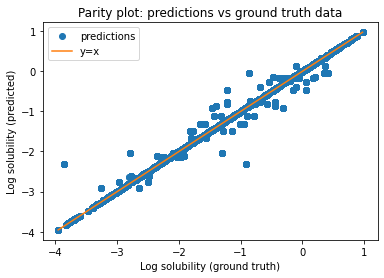

In [ ]:
import matplotlib.pyplot as plt
preds = model_rf.predict(X_train)
x_y_line = np.linspace(min(y_train.flatten()), max(y_train.flatten()), 500)
plt.plot(y_train.flatten(), preds.flatten(), 'o', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Parity plot: predictions vs ground truth data")
plt.legend()

In [ ]:
from xgboost import XGBRegressor
model_xgr = XGBRegressor(n_estimators = 10000, random_state = 0)
model_xgr.fit(X_train, y_train)

[10:30:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred_test_rf = model_rf.predict(X_test)
res = "\n".join("{} {}".format(x, y) for x, y in zip(y_test,Y_pred_test_rf ))
print(res)

-3.601867258 -3.59773263636296
-1.399099211 -0.872097221258885
-0.564126195 -0.5638030568699847
-2.415426198 -2.415426198000015
-0.5495913029999999 -0.5476579595830033
-2.17416425 -2.1741642500000506
0.052120124000000004 -0.2572140639621289
-2.062583221 -2.0625832210000232
-0.7495416909999999 -0.7495416909999922
-1.708604119 -1.707937950344016
-2.673538801 -2.673538801000013
-3.408935393 -3.40620903719597
-2.886123037 -2.886123036999965
-0.09622215 -0.09891155811900156
0.533701714 0.5337017140000067
-2.897091314 -2.895908998318013
-1.355566778 -1.3565461151189915
-2.222083205 -2.2220832050000086
-0.725034713 -0.7250347130000111
-0.30016229 -0.30016229000000255
-0.8026711240000001 -0.8130747347399983
0.871572936 0.8747732434471586
-1.8663102619999998 -1.8663102620000223
-1.910350113 -1.9103501130000349
-2.554632308 -2.5546323079999635
-1.353697444 -1.3536974440000094
-1.289524726 -1.2895247260000084
-1.524765299 -1.5247652989999816
0.6981005459999999 0.6963245341539877
-2.879728133 -2.8

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred_test_rf)

0.992445778170543

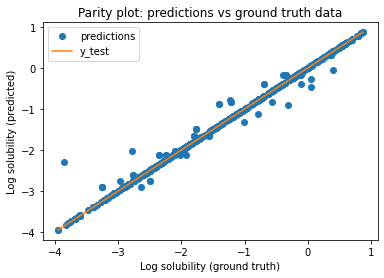

In [ ]:
import matplotlib.pyplot as plt
preds = model_rf.predict(X_test)
x_y_line = np.linspace(min(y_test.flatten()), max(y_test.flatten()), 500)
plt.plot(y_test.flatten(), preds.flatten(), 'o', label='predictions')
plt.plot(x_y_line, x_y_line, label='y_test')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Parity plot: predictions vs ground truth data")
plt.legend()

In [ ]:
import pickle
#### Save the model :::::
#filename = 'finalized_model.rf'
pickle.dump(model_rf, open('/content/drive/MyDrive/KIT/finalized_model_ethanol_99%.pkl', 'wb'))
 



In [ ]:
# some time later...
import pickle 
# load the model from disk
loaded_model = pickle.load(open('/content/drive/MyDrive/KIT/finalized_model_ethanol_99%.pkl', 'rb'))
Y_pred_test_rf = loaded_model.predict(X_test)
result = r2_score(y_test, Y_pred_test_rf)
print(result)

NameError: ignored

In [ ]:
elem=input("Enter smiles get solubility ")
#elem='CCc1ccccc1C'
#moldata = []
#for elem in smiles:
mol = Chem.MolFromSmiles(elem)
#moldata.append(mol)

#    baseData = np.arange(1, 1)
#    i = 0
#    for mol in moldata:

desc_MolLogP = Crippen.MolLogP(mol)
desc_MolWt = Descriptors.MolWt(mol)
desc_NumRotatableBonds = Lipinski.NumRotatableBonds(mol)
desc_AromaticProportion = getAromaticProportion(mol)
desc_Ringcount        =   Descriptors.RingCount(mol)
desc_TPSA = Descriptors.TPSA(mol)
desc_Hdonrs=Lipinski.NumHDonors(mol)
desc_SaturatedRings = Lipinski.NumSaturatedRings(mol)   
desc_AliphaticRings = Lipinski.NumAliphaticRings(mol) 
desc_HAcceptors = Lipinski.NumHAcceptors(mol)
desc_Heteroatoms = Lipinski.NumHeteroatoms(mol)
#desc_molMR=Descriptors.MolMR(mol)
row = np.array([desc_MolLogP,desc_MolWt,desc_NumRotatableBonds,desc_AromaticProportion,desc_Ringcount,desc_TPSA,desc_Hdonrs,desc_SaturatedRings,desc_AliphaticRings,desc_HAcceptors,desc_Heteroatoms])
                     #   
                     #   
                     #   )

        #if i == 0:
baseData = row
        #else:
baseData = np.vstack([row])
#i = i + 1

columnNames = ["MolLogP", "MolWt", "NumRotatableBonds", "AromaticProportion","Ring_Count","TPSA","H_donors","Saturated_Rings","AliphaticRings","H_Acceptors","Heteroatoms"]
descriptors = pd.DataFrame(data=baseData, columns=columnNames)
descriptors =np.array(descriptors) 
preds=loaded_model.predict(descriptors)
#predict_test_input = smiles_to_onehots(['elem'], charset, max_smiles_chars)
#loaded_model1 = load_model("/content/drive/MyDrive/solubility_model_8858.hdf5")
#solubility_prediction = loaded_model.predict(predict_test_input)
print(preds)
#print(solubility_prediction)
#print(type(descriptors))    


Enter smiles get solubility Cc1cccc(C=C)c1
[-3.32955893]
